# Principle Component Analysis

## How PCA works?

Understanding PCA without visuals is difficult so I would strongly recommend watching this quick video after this notebook implementation.
## [PCA in detail](https://www.youtube.com/watch?v=_UVHneBUBW0&t=2s)

PCA finds the principal components of data.

It is often useful to measure data in terms of its principal components rather than on a normal x-y axis. So what are principal components then? They’re the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. 


PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle
axis occurs first. (more important = more variance/more spread out data)

How does PCA work:

* Calculate the covariance matrix X of data points.
* Calculate eigen vectors and corresponding eigen values.
* Sort the eigen vectors according to their eigen values in decreasing order.
* Choose first k eigen vectors and that will be the new k dimensions.
* Transform the original n dimensional data points into k dimensions.


For Eigen term details : http://setosa.io/ev/eigenvectors-and-eigenvalues/

For additional information:
* https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
* https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0
* https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

## Small EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Raimundo\.conda\envs\AAS\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target'])

In [3]:
iris_data.head()

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.head()

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


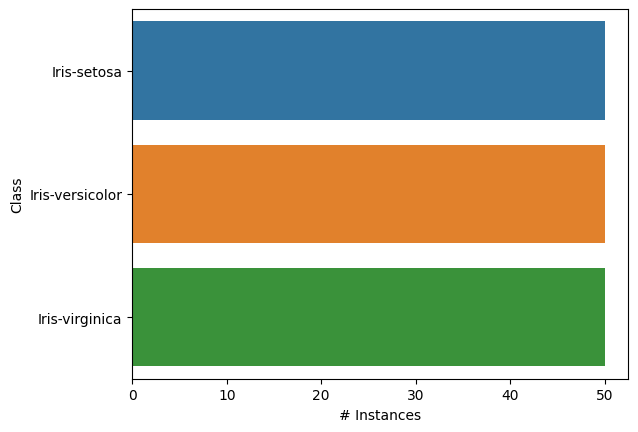

In [5]:
sns.countplot(y=iris_data.target, data=iris_data)
plt.xlabel("# Instances")
plt.ylabel("Class")
plt.show()

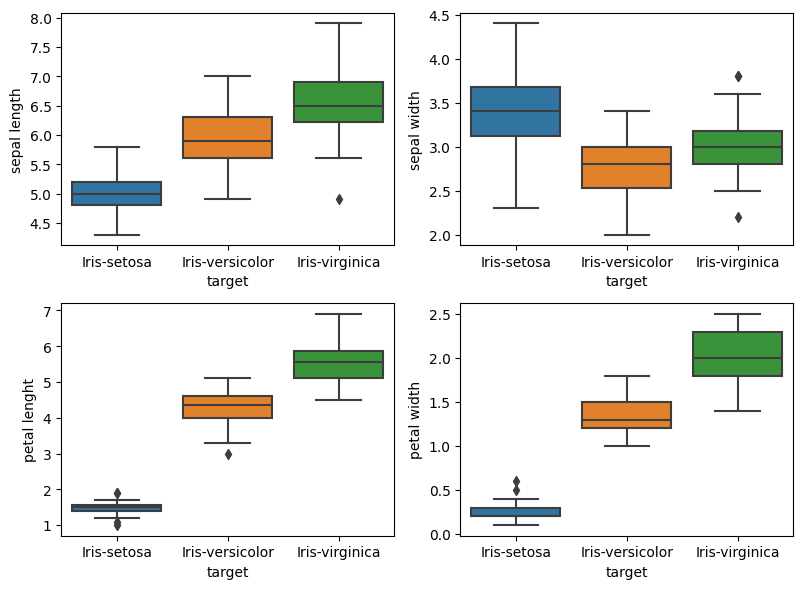

In [6]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(8,6))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['target'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

## Perform PCA (Scikit-Learn)

### Perform Scaling on the Data

This means that we need to center and scale the data. In this way the average value of each record would be 0 and the variance for each record would be 1.

To scale our data, we would us**MinMaxScaler**ar which is available in sklear.

Note that we are only going to scale the features and not the target. So to do :

* Salar
separate the features from the
* Sarget
scale the 

eatures
This three operations are accomplished using the four lines of co:des below

In [7]:
X = iris_data.drop(['target'],axis=1)
y = iris_data.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Apply PCA from Sklearn

To then perform PCA we would use PCA module from sklearn which we have already imported above. 

You can view your data by typing principalComponents or principalDataframe in a cell and running it.

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDataframe.head()

,PC1,PC2
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558


### Combine the Target and the Principal Components
Remember that the original data has five columns: four features and one target column. Now after performing PCA, we have just two columns for the features. The target dataset y was not touched. Therefore, we attached back the target column to the new set of principal components. To do that, use the code below:

In [9]:
targetDataframe = iris_data[['target']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,target
0,-0.630361,0.111556,Iris-setosa
1,-0.623546,-0.100313,Iris-setosa
2,-0.669793,-0.047220,Iris-setosa
3,-0.654633,-0.098791,Iris-setosa
4,-0.648263,0.137558,Iris-setosa


### Plot of the Principal Components

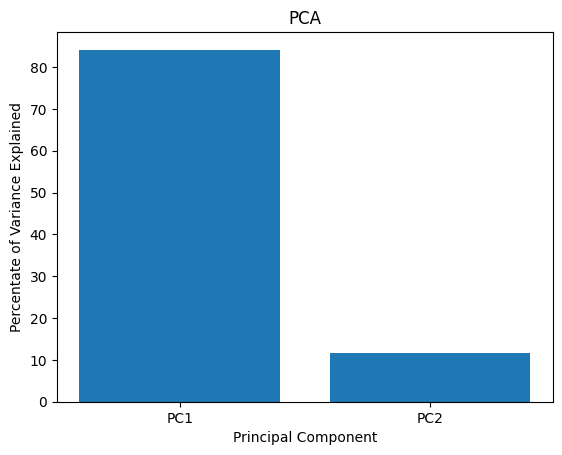

In [10]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
plt.bar(x=range(1,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA')
plt.show()

### Plot the Principal Components in 2D

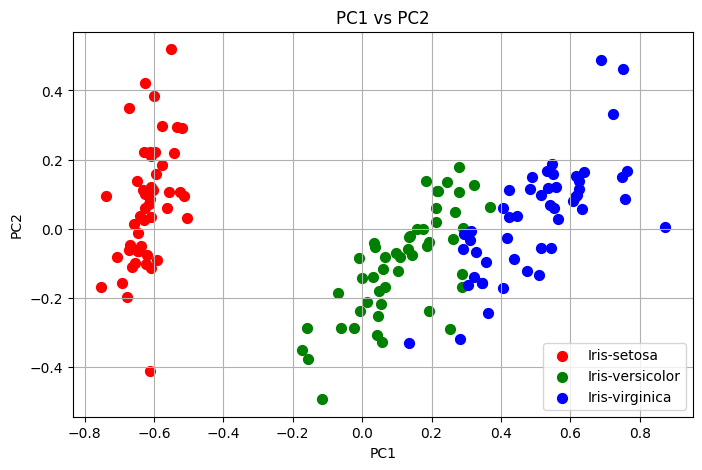

In [11]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('PC1 vs PC2', fontsize = 12)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

### Explaining the Variance Using Principal Component

Finally  we need to see how the two principal components explain our data. To do that we would use the command below:

In [12]:
pca.explained_variance_ratio_

array([0.84141901, 0.11732474])

This values show that the first principal component PC1 explains **84.14%** of the variation in the original data while the second principal component explains **11.73%** of the variation in the original data.

In conclusion, this means that the original **4 dimensional data** can be safely reduced to **2 dimensions** using PCA because the dataset can be explained by only two components!

## Predictive Modelling

### 1. Without PCA

In [13]:
# Enconde labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

In [14]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9583333333333334 %
Test score before PCA 0.9666666666666667 %


### 2. With PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA() # defaults to 4 components
X_new = pca.fit_transform(X)

In [16]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [17]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

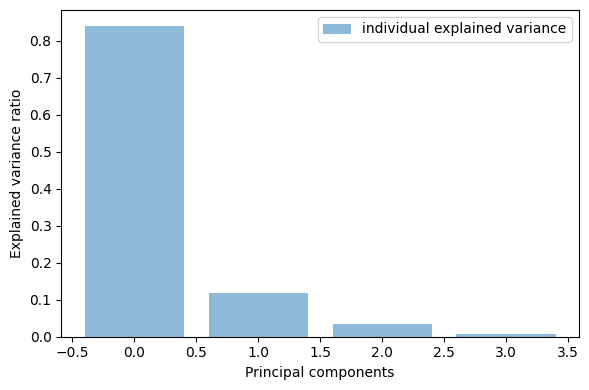

In [18]:
plt.figure(figsize=(6, 4))
plt.bar(range(4), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [19]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [20]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=1, stratify=y)

In [21]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.95 %
Test score after PCA 1.0 %
